In [1]:
!pip install ipykernel

!pip install xgboost
import xgboost as xgb

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/124.9 MB 2.8 MB/s eta 0:00:45
    --------------------------------------- 2.1/124.9 MB 3.3 MB/s eta 0:00:38
    --------------------------------------- 2.1/124.9 MB 3.3 MB/s eta 0:00:38
   - -------------------------------------- 4.2/124.9 MB 3.9 MB/s eta 0:00:32
   - -------------------------------------- 5.2/124.9 MB 4.2 MB/s eta 0:00:29
   -- ------------------------------------- 6.3/124.9 MB 4.4 MB/s eta 0:00:28
   -- ------------------------------------- 7.9/124.9 MB 4.8 MB/s eta 0:00:25
   --- ------------------------------------ 9.4/124.9 MB 5.0 MB/s eta 0:00:24
   --- ------------------------------------ 10.2/124.9 MB 5.1 MB/s eta 0:00:23
   --- ------------------------------------ 11.3/124.9 MB 4.8 MB/s eta 0:00:24
   --

In [14]:
!pip cache purge

Files removed: 2635


In [2]:

!pip install --upgrade setuptools wheel
!pip install numba
!pip install shap
import shap
shap.initjs()

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)


In [3]:
#Imports
import pandas as pd

import matplotlib.pyplot as plt



!pip install utils
import sys
sys.path.append('../')
import utils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13935 sha256=71eb2e4fca9afbe90abc681867bb03d50c27a2380ed916681d5a7d4d631f099e
  Stored in directory: c:\users\majix\appdata\local\pip\cache\wheels\b6\a1\81\1036477786ae0e17b522f6f5a838f9bc4288d1016fc5d0e1ec
Successfully built utils


In [4]:
#Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/refs/heads/ma in/insurance.csv")

print("Number of rows: {}".format(len(data)))
data.head(10)

Number of rows: 1338


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
#Feature engineering
data['sex'] = [1 if s =='male' else 0 for s in data['sex']]
data['smoker'] = [1 if s =='yes' else 0 for s in data['smoker']]

data['region.SW'] = [1 if r =='southwest' else 0 for r in data['region']]
data['region.SE'] = [1 if r =='southeast' else 0 for r in data['region']]
data['region.NW'] = [1 if r =='northwest' else 0 for r in data['region']]
data['region.NE'] = [1 if r =='northeast' else 0 for r in data['region']]

data = data.drop('region', axis=1)

data.head(10)

,age,sex,bmi,children,smoker,charges,region.SW,region.SE,region.NW,region.NE
0,19,0,27.900,0,1,16884.92400,1,0,0,0
1,18,1,33.770,1,0,1725.55230,0,1,0,0
2,28,1,33.000,3,0,4449.46200,0,1,0,0
3,33,1,22.705,0,0,21984.47061,0,0,1,0
4,32,1,28.880,0,0,3866.85520,0,0,1,0
5,31,0,25.740,0,0,3756.62160,0,1,0,0
6,46,0,33.440,1,0,8240.58960,0,1,0,0
7,37,0,27.740,3,0,7281.50560,0,0,1,0
8,37,1,29.830,2,0,6406.41070,0,0,0,1
9,60,0,25.840,0,0,28923.13692,0,0,1,0


Text(0.5, 0, 'Actual')

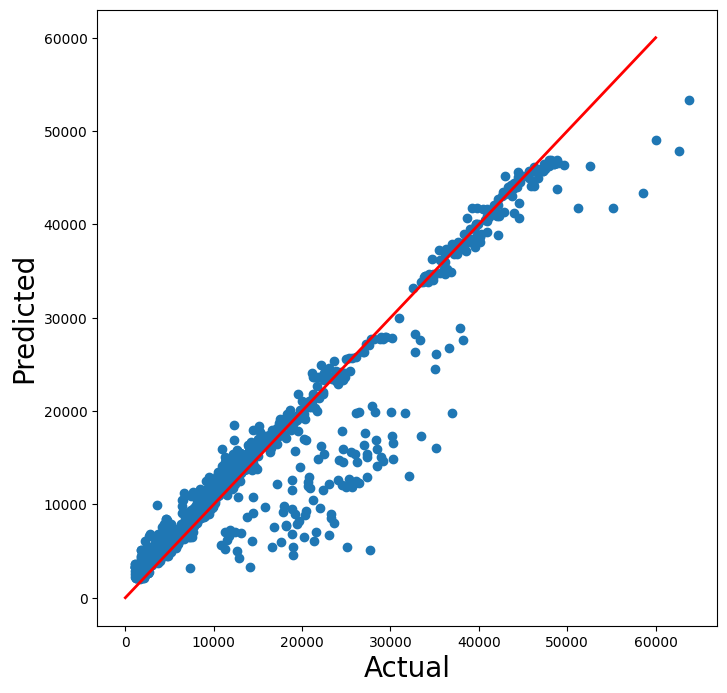

In [6]:
y = data['charges']
X = data.drop('charges', axis=1)

#Train model
model = xgb.XGBRegressor(objective="reg:squarederror"
                         ,n_estimators=10) 
model.fit(X, y)

#Get predictions
y_pred = model.predict(X)

#Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
plt.plot([0, 60000], [0, 60000], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

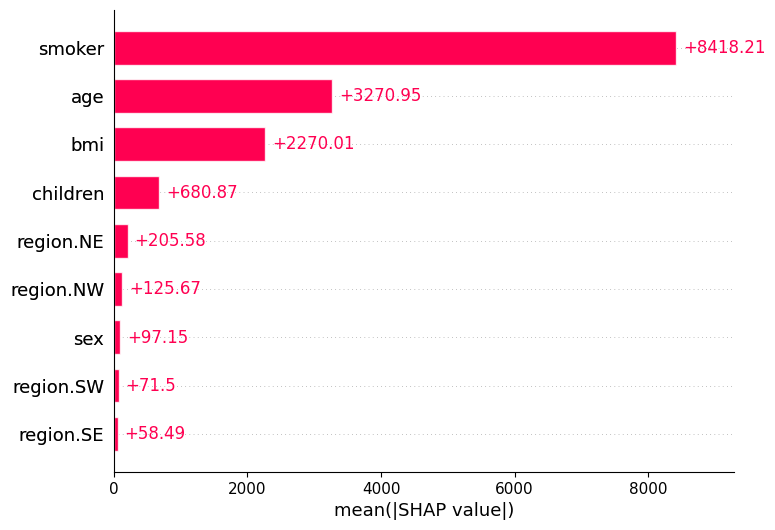

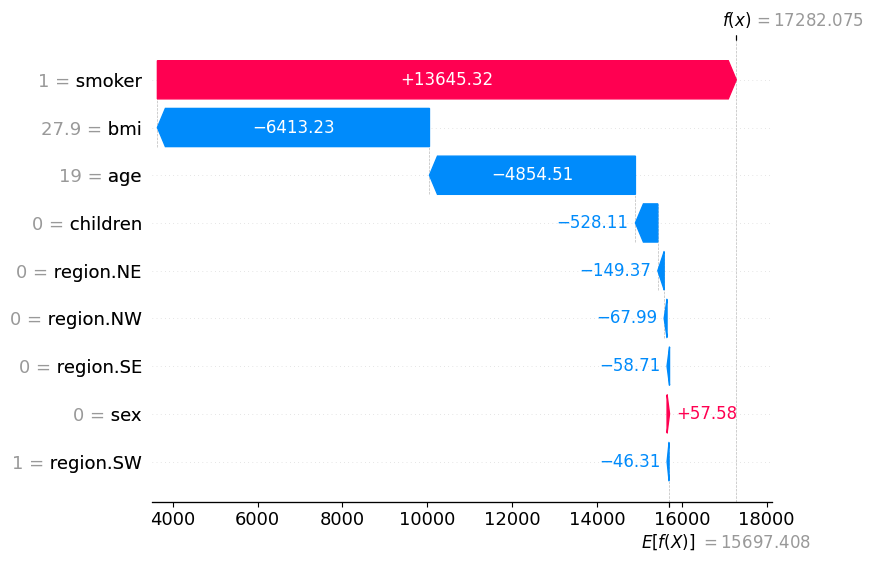

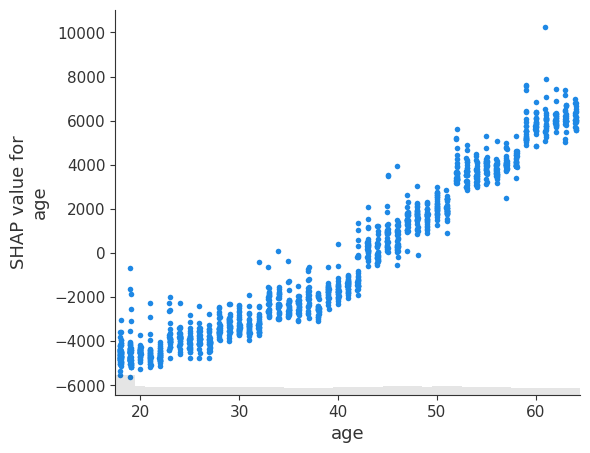

In [7]:
# Create SHAP explainer
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# SHAP Bar Plot
shap.plots.bar(shap_values)

# SHAP Waterfall Plot (for a single prediction, e.g., the first one)
shap.plots.waterfall(shap_values[0])

# SHAP Scatter Plot (for a specific feature, e.g., 'age')
shap.plots.scatter(shap_values[:, "age"])



## Explicación
En este caso podemos ver que en general, el modelo funciona bastante bien. En este caso lo que está haciendo el modelo es agregar o reducir costos dependiendo de ciertos factores. Por ejemplo, el costo aumenta bastante si la persona fuma, de igual manera si la persona tiene un índice de masa corporal muy alto o bajo, si la persona tiene hijos, y conforme va aumentando la edad. Podemos ver en general cómo estos factores afectan a la persona media en la gráfica 2. Veamos que las primeras dos gráficas nos dicen básicamente lo mismo, aunque la segunda es una simulación para una persona en específico. 

La tercera gráfica ya es un poco diferente, ya que podemos claramente ver que el modelo tiene una correlación positiva entre la edad y lso costos médicos. Esto nos indica que el modelo considera la edad como un factor de riesgo, ya que tienen más posibilidades de desarrollar enfermedades e incurrir en gastos médicos.